<a href="https://colab.research.google.com/github/Pedro-HMC-Martins/Classificacao_e_agrupamento_Caes/blob/main/Classifica%C3%A7%C3%A3o_e_agrupamento_de_C%C3%A3es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.9 MB/s eta 0:00:00


In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
akc_dataset = pd.read_csv('/content/akc-data-latest.csv')

In [ ]:
akc_dataset

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


# Eliminação de colunas

```
1.   Eliminando a coluna "description", pois além de ser difícil inserir em um modelo, apresenta informações subjetivas para a máquina, como também informações que já existem dentro da base de dados.
2.   Eliminando a coluna "popularity", devido a valores faltantes tanto na base de dados quanto no próprio site https://www.akc.org/ onde a base de dados foi construida, foi verificado também que essa coluna é um ranking e por isso não é possível usar média ou moda uma vez que cada raça possui um valor único.
3.   Eliminando as colunas "grooming_frequency_category","shedding_category", "energy_level_category", "trainability_category" e "demeanor_category", pois já possui na base de dados outros atributos semelhantes que irão fazer a mesma função, optei pelos valores numéricos porque oferecerão menos trabalho pelo fato de já serem valores numéricos e não categóricos.
4.   Eliminando a coluna de "temperament", possui muitos temperamentos diferentes para poucos dados disponiveis.
```

In [ ]:
akc_dataset = akc_dataset.drop('description', axis = 1)

In [ ]:
akc_dataset = akc_dataset.drop('popularity', axis = 1)
akc_dataset = akc_dataset.drop('grooming_frequency_category', axis = 1)
akc_dataset = akc_dataset.drop('shedding_category', axis = 1)
akc_dataset = akc_dataset.drop('energy_level_category', axis = 1)
akc_dataset = akc_dataset.drop('trainability_category', axis = 1)
akc_dataset = akc_dataset.drop('demeanor_category', axis = 1)
akc_dataset

,Unnamed: 0,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,Affenpinscher,"Confident, Famously Funny, Fearless",22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,Afghan Hound,"Dignified, Profoundly Loyal, Aristocratic",63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,Airedale Terrier,"Friendly, Clever, Courageous",58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,Akita,"Courageous, Dignified, Profoundly Loyal",60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,Alaskan Malamute,"Affectionate, Loyal, Playful",58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,"Gentle, Loyal, Trainable",54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,Working Kelpie,"Alert, Eager, Intelligent",48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,Xoloitzcuintli,"Loyal, Alert, Calm",25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,Yakutian Laika,"Affectionate, Intelligent, Active",53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


In [ ]:
akc_dataset = akc_dataset.drop('temperament', axis = 1)

In [ ]:
akc_dataset

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,Affenpinscher,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,Afghan Hound,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,Airedale Terrier,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,Akita,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,Alaskan Malamute,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,Working Kelpie,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,Xoloitzcuintli,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,Yakutian Laika,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


# Preenchimento de espaços vazios no dataset

Para preencher o "demeanor_value" usei o "OPENNESS TO STRANGERS" do site da akc os outros existem no site com o mesmo nome.
Os valores 1,0.8,0.6,0.4,0.2,0.0 já estão definidos no próprio site da akc por uma barra com cinco níveis.

In [ ]:
akc_dataset.isnull().sum()

Unnamed: 0                   0
min_height                   0
max_height                   0
min_weight                   2
max_weight                   2
min_expectancy               3
max_expectancy               3
group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64

In [ ]:
akc_dataset.to_csv('akc_dataset_reduzido.csv', index=False)

In [ ]:
akc_dataset.loc[pd.isnull(akc_dataset['min_weight'])]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
16,Australian Kelpie,43.18,50.80,NaN,NaN,10.0,13.0,Foundation Stock Service,0.4,0.8,0.8,1.0,0.6
244,Spinone Italiano,55.88,68.58,NaN,NaN,10.0,12.0,Sporting Group,0.4,NaN,0.8,0.6,0.6


In [ ]:
akc_dataset.loc[pd.isnull(akc_dataset['max_expectancy'])]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
55,Braque Francais Pyrenean,46.990,58.42,18.143695,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,1.0,NaN,NaN
67,Carolina Dog,45.085,49.53,13.607771,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,0.6,1.0,0.6
71,Central Asian Shepherd Dog,64.770,69.85,39.916129,49.895161,NaN,NaN,Foundation Stock Service,0.2,0.6,0.4,0.4,0.2


In [ ]:
akc_dataset.loc[pd.isnull(akc_dataset['demeanor_value'])]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
9,American Hairless Terrier,30.48,40.64,5.443108,7.257478,14.0,16.0,Terrier Group,NaN,NaN,NaN,NaN,NaN
55,Braque Francais Pyrenean,46.99,58.42,18.143695,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,1.0,NaN,NaN
58,Broholmer,69.85,74.93,40.823313,68.038855,8.0,10.0,Foundation Stock Service,0.2,0.6,0.4,NaN,NaN
90,Danish-Swedish Farmdog,31.75,36.83,6.803886,9.071847,11.0,13.0,Foundation Stock Service,0.2,0.4,0.8,NaN,NaN
91,Deutscher Wachtelhund,45.72,53.34,18.143695,24.947580,12.0,14.0,Foundation Stock Service,0.4,NaN,0.6,NaN,NaN
93,Dogo Argentino,60.96,67.31,39.916129,45.359237,9.0,15.0,Working Group,0.2,0.2,1.0,NaN,NaN
104,Estrela Mountain Dog,62.23,73.66,34.926612,59.874193,10.0,14.0,Foundation Stock Service,0.4,0.6,0.4,NaN,NaN
111,French Spaniel,54.61,60.96,22.679619,27.215542,10.0,12.0,Foundation Stock Service,NaN,NaN,NaN,NaN,NaN
131,Hokkaido,45.72,50.80,19.958064,29.937096,12.0,15.0,Foundation Stock Service,0.4,0.6,0.8,NaN,NaN
141,Jagdterrier,33.02,40.64,7.711070,9.979032,10.0,12.0,Foundation Stock Service,NaN,NaN,NaN,NaN,NaN


In [ ]:
akc_dataset = pd.read_csv('/content/akc_dataset_reduzido.csv')

In [ ]:
akc_dataset

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,Affenpinscher,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,Afghan Hound,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,Airedale Terrier,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,Akita,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,Alaskan Malamute,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,Working Kelpie,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,Xoloitzcuintli,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,Yakutian Laika,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


In [ ]:
akc_dataset.isnull().sum()

Unnamed: 0                  0
min_height                  0
max_height                  0
min_weight                  0
max_weight                  0
min_expectancy              0
max_expectancy              0
group                       0
grooming_frequency_value    1
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

In [ ]:
akc_dataset.loc[pd.isnull(akc_dataset['grooming_frequency_value'])]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
242,Spanish Mastiff,71.12,88.9,63.502932,90.718474,10.0,12.0,Foundation Stock Service,NaN,0.6,0.4,0.6,0.6


In [ ]:
akc_dataset = pd.read_csv('/content/akc_dataset_reduzido.csv')
akc_dataset.isnull().sum()

Unnamed: 0                  0
min_height                  0
max_height                  0
min_weight                  0
max_weight                  0
min_expectancy              0
max_expectancy              0
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

# Vizualização dos dados preenchidos


In [ ]:
grafico = px.scatter_matrix(akc_dataset, dimensions = ['min_height','max_height'], color = 'group')
grafico.show()

In [ ]:
akc_dataset.loc[akc_dataset['min_height'] < 7.5]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
74,Chihuahua,12.7,20.32,2.721554,2.721554,14.0,16.0,Toy Group,0.2,0.4,0.6,0.4,0.6
87,Dachshund,12.7,22.86,4.989516,14.514956,12.0,16.0,Hound Group,0.4,0.4,0.6,0.6,0.6
268,Wetterhoun,12.7,58.42,22.679619,34.019428,13.0,13.0,Foundation Stock Service,0.2,0.4,0.6,0.2,0.4


É possível vizualizar que wetterhoun tem uma diferença de altura muito grande,possívelmente seus dados estão incorretos e serão ,caso estejam errados, modificados para seus devidos valores.

In [ ]:
grafico1 = px.scatter_matrix(akc_dataset, dimensions = ['max_height','max_weight'])
grafico1.show()

In [ ]:
akc_dataset.loc[akc_dataset['max_weight'] < 7.5]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,Affenpinscher,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
9,American Hairless Terrier,30.48,40.64,5.443108,7.257478,14.0,16.0,Terrier Group,0.2,0.2,0.6,1.0,0.6
38,Biewer Terrier,17.78,27.94,1.814369,3.628739,16.0,16.0,Miscellaneous Class,0.6,0.2,0.4,1.0,1.0
45,Bolognese,25.40,30.48,2.494758,4.082331,12.0,14.0,Foundation Stock Service,0.6,0.2,0.4,0.6,0.8
47,Border Terrier,30.48,38.10,5.216312,7.030682,12.0,15.0,Terrier Group,0.4,0.4,0.6,0.8,0.8
59,Brussels Griffon,17.78,25.40,3.628739,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.6,0.8
63,Cairn Terrier,24.13,25.40,5.896701,6.350293,13.0,15.0,Terrier Group,0.4,0.4,0.6,0.6,0.8
65,Cane Corso,59.69,69.85,0.000000,0.000000,9.0,12.0,Working Group,0.2,0.4,0.8,0.6,0.6
74,Chihuahua,12.70,20.32,2.721554,2.721554,14.0,16.0,Toy Group,0.2,0.4,0.6,0.4,0.6
75,Chinese Crested,27.94,33.02,3.628739,5.443108,13.0,18.0,Toy Group,0.2,0.2,0.6,0.6,0.8


Com essa tabela, é possivel verificar que a raça Cane Corso possui valores incorretos, que serão corrigidos manualmente.

In [ ]:
akc_dataset.loc[akc_dataset['max_weight'] > 80]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
43,Boerboel,55.88,68.58,68.038855,90.718474,9.0,11.0,Working Group,0.2,0.4,0.4,0.6,0.4
164,Mastiff,69.85,76.20,54.431084,104.326245,6.0,10.0,Working Group,0.2,0.4,0.6,0.6,0.6
208,Pyrenean Mastiff,63.50,78.74,54.431084,108.862169,10.0,13.0,Foundation Stock Service,0.6,0.6,0.4,0.6,0.6
219,Saint Bernard,66.04,76.20,54.431084,81.646627,8.0,10.0,Working Group,0.4,0.6,0.6,0.6,0.8
242,Spanish Mastiff,71.12,88.90,63.502932,90.718474,10.0,12.0,Foundation Stock Service,0.2,0.6,0.4,0.6,0.6
258,Tosa,54.61,59.69,45.359237,90.718474,10.0,12.0,Foundation Stock Service,0.2,0.4,0.4,0.6,0.4


In [ ]:
grafico2 = px.scatter_matrix(akc_dataset, dimensions = ['min_expectancy','max_expectancy'], color = 'group')
grafico2.show()

In [ ]:
akc_dataset.loc[akc_dataset['min_expectancy'] < 2]

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
209,Pyrenean Shepherd,38.1,53.34,6.803886,13.607771,0.0,0.0,Herding Group,0.4,0.6,0.8,0.6,0.4


A expectativa de vida da raça Pyrenean Shepherd foi corrigida no arquivo de texto.

Verificação de que não possui nenhum valor maior que 1 ou menor que 0 dos atributos grooming_frequency_value, shedding_value, energy_level_value	trainability_value,	demeanor_value

In [ ]:
grafico3 = px.scatter_matrix(akc_dataset, dimensions = ['grooming_frequency_value','shedding_value'], color = 'group')
grafico3.show()

In [ ]:
grafico4 = px.scatter_matrix(akc_dataset, dimensions = ['energy_level_value','trainability_value'], color = 'group')
grafico4.show()

In [ ]:
grafico5 = px.scatter_matrix(akc_dataset, dimensions = ['demeanor_value','trainability_value'], color = 'group')
grafico5.show()

# Concatenação de colunas e Redução de dimensionalidade.

Não é necessário usar as medidas máxima e mínimas de cada raça, basta utilizar a média, diminuindo a dimensionalidade do dataset.Dessa forma as colunas de peso máximo e peso mínimo, tamanho máximo e tamanho mínimo e expectativa de vida máxima e mínima se tornarão peso médio, tamanho médio e expectativa de vida média.

In [ ]:
akc_dataset['average height'] = (akc_dataset['min_height'] + akc_dataset['max_height']) / 2

In [ ]:
akc_dataset

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height
0,Affenpinscher,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0,26.035
1,Afghan Hound,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2,66.040
2,Airedale Terrier,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8,58.420
3,Akita,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6,66.040
4,Alaskan Malamute,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8,60.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6,59.055
273,Working Kelpie,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6,55.880
274,Xoloitzcuintli,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6,41.910
275,Yakutian Laika,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4,55.880


In [ ]:
akc_dataset['average weight'] = (akc_dataset['min_weight'] + akc_dataset['max_weight']) / 2
akc_dataset['average expectancy'] = (akc_dataset['min_expectancy'] + akc_dataset['max_expectancy']) / 2
akc_dataset

,Unnamed: 0,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height,average weight,average expectancy
0,Affenpinscher,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0,26.035,3.855535,13.5
1,Afghan Hound,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2,66.040,24.947580,13.5
2,Airedale Terrier,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8,58.420,27.215542,12.5
3,Akita,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6,66.040,45.359237,11.5
4,Alaskan Malamute,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8,60.960,36.287390,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6,59.055,24.947580,13.0
273,Working Kelpie,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6,55.880,19.958064,13.5
274,Xoloitzcuintli,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6,41.910,14.741752,15.5
275,Yakutian Laika,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4,55.880,21.545638,11.0


In [ ]:
akc_dataset = akc_dataset.drop('min_height', axis = 1)
akc_dataset = akc_dataset.drop('max_height', axis = 1)
akc_dataset = akc_dataset.drop('min_weight', axis = 1)
akc_dataset = akc_dataset.drop('max_weight', axis = 1)
akc_dataset = akc_dataset.drop('min_expectancy', axis = 1)
akc_dataset = akc_dataset.drop('max_expectancy', axis = 1)
akc_dataset

,Unnamed: 0,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height,average weight,average expectancy
0,Affenpinscher,Toy Group,0.6,0.6,0.6,0.8,1.0,26.035,3.855535,13.5
1,Afghan Hound,Hound Group,0.8,0.2,0.8,0.2,0.2,66.040,24.947580,13.5
2,Airedale Terrier,Terrier Group,0.6,0.4,0.6,1.0,0.8,58.420,27.215542,12.5
3,Akita,Working Group,0.8,0.6,0.8,1.0,0.6,66.040,45.359237,11.5
4,Alaskan Malamute,Working Group,0.6,0.6,0.8,0.4,0.8,60.960,36.287390,12.0
...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,Sporting Group,0.2,0.6,0.8,0.6,0.6,59.055,24.947580,13.0
273,Working Kelpie,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6,55.880,19.958064,13.5
274,Xoloitzcuintli,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6,41.910,14.741752,15.5
275,Yakutian Laika,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4,55.880,21.545638,11.0


In [ ]:
grafico6 = px.scatter_matrix(akc_dataset, dimensions = ['average height','average weight'])
grafico6.show()

In [ ]:
akc_dataset.to_csv('akc_dataset_final.csv', index=False)

In [ ]:
akc_dataset = pd.read_csv('/content/akc_dataset_final.csv')

In [ ]:
akc_dataset

,Unnamed: 0,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height,average weight,average expectancy
0,Affenpinscher,Toy Group,0.6,0.6,0.6,0.8,1.0,26.035,3.855535,13.5
1,Afghan Hound,Hound Group,0.8,0.2,0.8,0.2,0.2,66.040,24.947580,13.5
2,Airedale Terrier,Terrier Group,0.6,0.4,0.6,1.0,0.8,58.420,27.215542,12.5
3,Akita,Working Group,0.8,0.6,0.8,1.0,0.6,66.040,45.359237,11.5
4,Alaskan Malamute,Working Group,0.6,0.6,0.8,0.4,0.8,60.960,36.287390,12.0
...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,Sporting Group,0.2,0.6,0.8,0.6,0.6,59.055,24.947580,13.0
273,Working Kelpie,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6,55.880,19.958064,13.5
274,Xoloitzcuintli,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6,41.910,14.741752,15.5
275,Yakutian Laika,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4,55.880,21.545638,11.0


In [ ]:
correlacao = akc_dataset.corr()
correlacao.style.background_gradient(cmap = 'coolwarm')

<ipython-input-22-0270b1b7190c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height,average weight,average expectancy
grooming_frequency_value,1.000000,-0.078057,-0.132274,0.060914,0.111061,-0.232498,-0.148005,0.091994
shedding_value,-0.078057,1.000000,0.183137,0.008256,-0.201926,0.324219,0.304066,-0.342839
energy_level_value,-0.132274,0.183137,1.000000,0.097560,0.057249,0.184226,-0.069293,0.029126
trainability_value,0.060914,0.008256,0.097560,1.000000,0.312083,-0.044805,-0.086725,0.113587
demeanor_value,0.111061,-0.201926,0.057249,0.312083,1.000000,-0.280509,-0.275579,0.153382
average height,-0.232498,0.324219,0.184226,-0.044805,-0.280509,1.000000,0.838012,-0.540853
average weight,-0.148005,0.304066,-0.069293,-0.086725,-0.275579,0.838012,1.000000,-0.658945
average expectancy,0.091994,-0.342839,0.029126,0.113587,0.153382,-0.540853,-0.658945,1.000000


# Escolhendo atributo de saída

Atributo de entrada que foi escolhido para ser o atributo de saída foi o "group", pois aprensenta um número razoável de saídas para uma base de dados pequena.

In [ ]:
akc_dataset.columns

Index(['Unnamed: 0', 'group', 'grooming_frequency_value', 'shedding_value',
       'energy_level_value', 'trainability_value', 'demeanor_value',
       'average height', 'average weight', 'average expectancy'],
      dtype='object')

In [ ]:
X_akc_dataset = akc_dataset.iloc[:, 2:10].values

In [ ]:
X_akc_dataset

array([[ 0.6       ,  0.6       ,  0.6       , ..., 26.035     ,
         3.85553515, 13.5       ],
       [ 0.8       ,  0.2       ,  0.8       , ..., 66.04      ,
        24.94758035, 13.5       ],
       [ 0.6       ,  0.4       ,  0.6       , ..., 58.42      ,
        27.2155422 , 12.5       ],
       ...,
       [ 0.2       ,  0.2       ,  0.8       , ..., 41.91      ,
        14.74175203, 15.5       ],
       [ 0.4       ,  0.6       ,  0.8       , ..., 55.88      ,
        21.54563758, 11.        ],
       [ 1.        ,  0.2       ,  0.6       , ..., 19.05      ,
         3.17514659, 13.        ]])

In [ ]:
Y_akc_dataset = akc_dataset.iloc[:, 1].values

Atributo de saída "group" foi escolhido devido a uma boa variedade de grupos presentes, possuindo apenas 9 grupos, já que a base é pequena.

In [ ]:
Y_akc_dataset

array(['Toy Group', 'Hound Group', 'Terrier Group', 'Working Group',
       'Working Group', 'Foundation Stock Service', 'Hound Group',
       'Non-Sporting Group', 'Hound Group', 'Terrier Group',
       'Foundation Stock Service', 'Terrier Group', 'Sporting Group',
       'Working Group', 'Foundation Stock Service', 'Herding Group',
       'Foundation Stock Service', 'Herding Group',
       'Foundation Stock Service', 'Terrier Group', 'Hound Group',
       'Sporting Group', 'Hound Group', 'Foundation Stock Service',
       'Hound Group', 'Foundation Stock Service', 'Hound Group',
       'Herding Group', 'Herding Group', 'Terrier Group',
       'Miscellaneous Class', 'Herding Group', 'Herding Group',
       'Herding Group', 'Herding Group', 'Herding Group', 'Working Group',
       'Non-Sporting Group', 'Miscellaneous Class', 'Hound Group',
       'Working Group', 'Hound Group', 'Hound Group', 'Working Group',
       'Foundation Stock Service', 'Foundation Stock Service',
       'Herdin

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_akc_dataset = MinMaxScaler()
X_akc_dataset = scaler_akc_dataset.fit_transform(X_akc_dataset)

In [ ]:
X_akc_dataset

array([[0.5       , 0.5       , 0.5       , ..., 0.15      , 0.02      ,
        0.60869565],
       [0.75      , 0.        , 0.75      , ..., 0.78      , 0.28571429,
        0.60869565],
       [0.5       , 0.25      , 0.5       , ..., 0.66      , 0.31428571,
        0.52173913],
       ...,
       [0.        , 0.        , 0.75      , ..., 0.4       , 0.15714286,
        0.7826087 ],
       [0.25      , 0.5       , 0.75      , ..., 0.62      , 0.24285714,
        0.39130435],
       [1.        , 0.        , 0.5       , ..., 0.04      , 0.01142857,
        0.56521739]])

# Igualando a quantidade de atributos para que meu modelo não fique enviesado.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_akc_dataset.shape

(277, 8)

In [ ]:
smote = SMOTE(sampling_strategy = 'all')
X_akc_dataset_over, Y_akc_dataset_over = smote.fit_resample(X_akc_dataset, Y_akc_dataset)

Igualando as quantidades de todos os registros com a majoritária,ou seja criando aleatoriamente novos registros até ter quantidades iguais com a classe majoritária, para que meu modelo não fique enviesado.

In [ ]:
X_akc_dataset_over.shape

(612, 8)

In [ ]:
Y_akc_dataset_over.shape

(612,)

In [ ]:
from sklearn.model_selection import train_test_split

A divisão será feita da seguinte maneira: 75% para treinamento e 25%
para teste. Apesar da base de dados ser pequena, os resultados de acurácia foram melhores quando a parte dos dados para testes tiveram mais de 20% da base.

In [ ]:
X_akc_dataset_treinamento, X_akc_dataset_teste, Y_akc_dataset_treinamento, Y_akc_dataset_teste = train_test_split(X_akc_dataset_over, Y_akc_dataset_over, test_size = 0.25)

In [ ]:
Y_akc_dataset_treinamento.shape

(459,)

In [ ]:
X_akc_dataset_treinamento.shape

(459, 8)

# Modelo supervisionado - RandomForest - Accuracy 80% / Precision 80%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForest é um algoritmo de árvore que são utilizadas várias delas para chegar a um resultado final. O critério da contrução da árvore foi definido como entropia, ou seja, a raiz será o atributo que possui maior ganho de informação na hora de prever o resultado e os filhos serão ,conforme for chegando nas folhas, terão sua entropia cada vez menor. A quantidade de árvores geradas para a determinação do resultado foi 100, foram feitos alguns testes e a melhor quantidade foi a default que é 100. Random_state = 0 para obter o mesmo resultado e poder comparar com outros parametros.

In [ ]:
random_forest_akc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_akc.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes_forest = random_forest_akc.predict(X_akc_dataset_teste)
previsoes_forest

array(['Miscellaneous Class', 'Sporting Group', 'Working Group',
       'Miscellaneous Class', 'Terrier Group', 'Terrier Group',
       'Herding Group', 'Working Group', 'Toy Group', 'Toy Group',
       'Non-Sporting Group', 'Miscellaneous Class',
       'Foundation Stock Service', 'Working Group', 'Hound Group',
       'Foundation Stock Service', 'Toy Group', 'Toy Group',
       'Non-Sporting Group', 'Herding Group', 'Foundation Stock Service',
       'Terrier Group', 'Sporting Group', 'Herding Group',
       'Working Group', 'Toy Group', 'Working Group',
       'Foundation Stock Service', 'Miscellaneous Class', 'Terrier Group',
       'Terrier Group', 'Herding Group', 'Miscellaneous Class',
       'Non-Sporting Group', 'Working Group', 'Terrier Group',
       'Miscellaneous Class', 'Toy Group', 'Sporting Group',
       'Non-Sporting Group', 'Herding Group', 'Sporting Group',
       'Foundation Stock Service', 'Hound Group', 'Working Group',
       'Sporting Group', 'Miscellaneous Cla

In [ ]:
accuracy_score(Y_akc_dataset_teste, previsoes_forest)

0.803921568627451

In [ ]:
precision_score(Y_akc_dataset_teste, previsoes_forest, average='weighted')

0.8051895954736967

In [ ]:
recall_score(Y_akc_dataset_teste, previsoes_forest, average='weighted')

0.803921568627451

Utilizei GridSearchCV para ver se poderia de ,alguma forma, melhorar meus parâmetros, ele recomendou o número de árvores a serem geradas ser 150 porém ainda tem uma acurácia menor do que o padrão(100).

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros_RandomForest = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 50, 80, 100, 150, 200],
              'min_samples_split': [2, 4, 5, 7, 9, 10],
              'min_samples_leaf': [1, 2, 4, 5, 8, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_RandomForest)
grid_search.fit(X_akc_dataset_over, Y_akc_dataset_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.7992669598827135


Alterando os parâmetros para os recomendados do GridSeach, observa-se que o resultado da acurária e a precisão são bem similares aos anteriores.

In [ ]:
random_forest_akc2 = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)
random_forest_akc2.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)
previsoes_forest2 = random_forest_akc2.predict(X_akc_dataset_teste)

In [ ]:
accuracy_score(Y_akc_dataset_teste, previsoes_forest2)

0.7973856209150327

In [ ]:
precision_score(Y_akc_dataset_teste, previsoes_forest2, average='weighted')

0.8040206653528453

# Modelo supervisionado - Redes neurais - 79% Accuracy / 80% Precision

Redes Neurais tem uma estrutura parecida com a estrutura de dados Grafo onde apresenta pesos sem suas ligações para tentar chegar a um resultado. Esses pesos ajudam a prever assim como na Árvore de decisão onde é escolhido a raiz com base na entropia , também possui épocas para ajustar e aperfeiçoar esses valores afim de aumentar a acurácia e precisão.

In [ ]:
from sklearn.neural_network import MLPClassifier

Na base do teste o melhor resultado obtido foi com 15000 épocas, usei solver = 'lbfgs' pois em sua descrição diz que é mais indicado para bases pequenas além de ter testado com outros e a acurácia caiu drasticamente, verbose = true para ver as saídas, porém quando junto com o solver atual não aparece, activation='logistic' permite interpretar o resultado como uma probabilidade, os outros parâmetros deixei como default.

In [ ]:
rede_neural_akc = MLPClassifier(max_iter=15000, verbose=True,solver='lbfgs',activation='logistic')
rede_neural_akc.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)

MLPClassifier(activation='logistic', max_iter=15000, solver='lbfgs',
              verbose=True)

In [ ]:
previsoes_neural = rede_neural_akc.predict(X_akc_dataset_teste)

In [ ]:
accuracy_score(Y_akc_dataset_teste, previsoes_neural)

0.7843137254901961

In [ ]:
precision_score(Y_akc_dataset_teste, previsoes_neural, average='weighted')

0.7924779615015811

Mudança na ativação 'relu' é mais comum ser usado devido a seus benefícios como eficiência computacional e evita gradiente desvanecente.

In [ ]:
rede_neural_akc2 = MLPClassifier(max_iter=15000, verbose=True,solver='lbfgs',activation='relu')
rede_neural_akc2.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)

MLPClassifier(max_iter=15000, solver='lbfgs', verbose=True)

In [ ]:
previsoes_neural2 = rede_neural_akc2.predict(X_akc_dataset_teste)

In [ ]:
accuracy_score(Y_akc_dataset_teste, previsoes_neural2)

0.7908496732026143

In [ ]:
precision_score(Y_akc_dataset_teste, previsoes_neural2, average='weighted')

0.8006091563184988

# Modelo não supervisionado - KMeans

In [ ]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [ ]:
colunas = ['grooming_frequency_value','shedding_value',	'energy_level_value',	'trainability_value',	'demeanor_value',	'average height',	'average weight',	'average expectancy']
X_akc_dataset_over = pd.DataFrame(X_akc_dataset_over,columns=colunas)

In [ ]:
X_akc_dataset_over

,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height,average weight,average expectancy
0,0.500000,0.500000,0.500000,0.750000,1.000000,0.150000,0.020000,0.608696
1,0.750000,0.000000,0.750000,0.000000,0.000000,0.780000,0.285714,0.608696
2,0.500000,0.250000,0.500000,1.000000,0.750000,0.660000,0.314286,0.521739
3,0.750000,0.500000,0.750000,1.000000,0.500000,0.780000,0.542857,0.434783
4,0.500000,0.500000,0.750000,0.250000,0.750000,0.700000,0.428571,0.478261
...,...,...,...,...,...,...,...,...
607,0.189308,0.500000,0.750000,0.500000,0.500000,0.818843,0.655903,0.239759
608,0.413656,0.500000,0.500000,0.250000,0.413656,0.781445,0.609868,0.421337
609,0.250000,0.500000,0.531758,0.500000,0.281758,0.727622,0.589344,0.260870
610,0.056164,0.250000,0.943836,0.556164,0.612329,0.522685,0.187476,0.526146


In [ ]:
coluna = ['group']
Y_akc_dataset_over = pd.DataFrame(Y_akc_dataset_over,columns=coluna)

In [ ]:
Y_akc_dataset_over

,group
0,Toy Group
1,Hound Group
2,Terrier Group
3,Working Group
4,Working Group
...,...
607,Working Group
608,Working Group
609,Working Group
610,Working Group


A base de dados do modelo não supervisionado é diferente dos modelos supervisionado pelo fato de que a saída agora está presente, que é a colna grupo. Os procedimentos a seguir são um tratamento dessa coluna pois ela é considerada categórica e por isso precisa passar pelos processos de LabelEncoder e OneHotEncoder.

In [ ]:
akc_dataset_cluster = pd.merge(X_akc_dataset_over, Y_akc_dataset_over, left_index=True, right_index=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
akc_dataset_cluster

,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average height,average weight,average expectancy,group
0,0.500000,0.500000,0.500000,0.7500,1.000000,0.150000,0.020000,0.608696,Toy Group
1,0.750000,0.000000,0.750000,0.0000,0.000000,0.780000,0.285714,0.608696,Hound Group
2,0.500000,0.250000,0.500000,1.0000,0.750000,0.660000,0.314286,0.521739,Terrier Group
3,0.750000,0.500000,0.750000,1.0000,0.500000,0.780000,0.542857,0.434783,Working Group
4,0.500000,0.500000,0.750000,0.2500,0.750000,0.700000,0.428571,0.478261,Working Group
...,...,...,...,...,...,...,...,...,...
607,0.000000,0.328364,0.578364,0.5000,0.500000,0.905673,0.913216,0.144063,Working Group
608,0.414052,0.500000,0.750000,1.0000,0.667974,0.726248,0.427675,0.551634,Working Group
609,0.337652,0.500000,0.500000,0.2500,0.337652,0.817927,0.618554,0.447773,Working Group
610,0.169372,0.580628,0.830628,1.0000,0.669372,0.725801,0.389858,0.538584,Working Group


In [ ]:
label_encoder_group = LabelEncoder()

In [ ]:
akc_dataset_cluster = akc_dataset_cluster.values

In [ ]:
akc_dataset_cluster[:,8] = label_encoder_group.fit_transform(akc_dataset_cluster[:,8])

In [ ]:
akc_dataset_cluster

array([[0.5, 0.5, 0.5, ..., 0.020000000000000007, 0.608695652173913, 7],
       [0.75, 0.0, 0.75, ..., 0.28571428571428575, 0.608695652173913, 2],
       [0.5, 0.25, 0.5, ..., 0.31428571428571433, 0.5217391304347826, 6],
       ...,
       [0.33765161502682717, 0.5, 0.5, ..., 0.6185541011397911,
        0.44777335129501666, 8],
       [0.16937204396570657, 0.5806279560342934, 0.8306279560342934, ...,
        0.3898578185221242, 0.5385843860571361, 8],
       [0.6746501250674813, 0.5, 0.9246501250674813, ...,
        0.38865139998457576, 0.569382673948251, 8]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_akc_dataset = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')

In [ ]:
akc_dataset_cluster = onehotencoder_akc_dataset.fit_transform(akc_dataset_cluster)

In [ ]:
akc_dataset_cluster[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.5, 0.5, 0.75,
       1.0, 0.15000000000000002, 0.020000000000000007, 0.608695652173913],
      dtype=object)

In [ ]:
akc_dataset_cluster.shape

(612, 17)

Gerando o gráfico do cotovelo para verificar qual o melhor valor para K a ser utilizado.

In [ ]:
wcss = []
for i in range(1,21):
  kmeans_akc = KMeans(n_clusters=i, random_state=0)
  kmeans_akc.fit(akc_dataset_cluster)
  wcss.append(kmeans_akc.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

É possível visualizar que o valor 9 é o ideal para o valor de K, visto que apresenta a maior curva no gráfico abaixo. Esse valor também representa a quantidade de grupos únicos presentes na minha coluna que foi utilizada como saída dos modelos supervisionados.

In [ ]:
grafico7 = px.line(x = range(1,21), y = wcss)
grafico7.show()

Utilização do K = 9

In [ ]:
kmeans_akc = KMeans(n_clusters=9, random_state=0)
rotulos = kmeans_akc.fit_predict(akc_dataset_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
akc_dataset_cluster[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.5       ,
       0.5       , 0.5       , 0.75      , 1.        , 0.15      ,
       0.02      , 0.60869565])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
akc_dataset_cluster_pca = pca.fit_transform(akc_dataset_cluster)

In [ ]:
akc_dataset_cluster_pca.shape

(612, 2)

In [ ]:
kmeans_akc = KMeans(n_clusters=5, random_state=0)
rotulos = kmeans_akc.fit_predict(akc_dataset_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Modelo não supervisionado - DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

Esse modelo é baseado em densidade, agrupando os pontos similares no mesmo espaço, não é necessário colocar o número de clusters porque ele mesmo descobre, encontra padrões não lineares e é bom contra outliers.

In [ ]:
dbscan_akc = DBSCAN(eps = 0.5, min_samples=4)
rotulos2 = dbscan_akc.fit_predict(akc_dataset_cluster)

In [ ]:
rotulos2

array([ 0,  4, -1,  1,  2,  3,  4,  5,  4,  6,  3,  6,  7,  2,  3, 11,  3,
        8,  3,  6,  4,  7,  4, -1, 12,  3,  4,  8,  8,  6,  9,  8,  8,  8,
        8,  8, -1, 10,  9,  4,  1,  4,  4,  2,  3, -1,  8,  6,  4,  5,  8,
        2,  7,  9,  3,  3,  8,  7, -1,  0,  6,  5,  2,  6, 11,  2,  8,  3,
        3, -1,  0,  3,  6,  7,  0,  0,  5,  2,  5,  4,  7,  7,  8, 10,  3,
        7,  3,  4,  5,  6,  3,  3, -1, -1,  2,  3,  3,  9,  7,  4,  7,  7,
        0, -1,  3,  3,  7,  8,  5,  7,  5,  3,  3,  2,  8,  7,  3,  7,  1,
        6,  7,  7,  4,  2,  2,  2,  4, -1,  3,  4,  0,  3,  3,  4,  8,  7,
       -1,  6,  7,  4,  0,  3,  0,  3,  3,  3,  3,  5,  6,  3,  2,  3,  2,
        7,  7,  6,  9,  3,  1,  5,  5,  0,  6,  0,  2,  8,  6,  0, -1,  3,
        9, -1,  7,  2,  6,  9,  8,  4,  5,  6,  7,  8,  4,  0,  6,  0,  8,
        3,  9,  4,  4,  4,  7, -1,  0, 10, -1,  0,  3,  9,  4,  3,  3,  1,
        3,  0,  8,  8, -1,  8,  3,  6,  4,  4,  3,  2,  6,  9,  3,  2,  4,
        2,  3,  5,  4,  6

In [ ]:
np.unique(rotulos2, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([22, 68,  8, 53, 59, 65, 58, 66, 67, 60, 68,  9,  6,  3]))

Mudanças no 'eps' que é a distância entre os pontos, foi observado no gráfico que o modelo acertou o número de grupos únicos

In [ ]:
dbscan_akc2 = DBSCAN(eps = 0.7, min_samples=4)
rotulos3 = dbscan_akc2.fit_predict(akc_dataset_cluster)

No trecho de código abaixo é observável que o modelo conseguiu dividir ,por igual, cada grupo, ou seja, no gráfico teremos o mesmo número de pontos para cada cor.

In [ ]:
np.unique(rotulos3, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([68, 68, 68, 68, 68, 68, 68, 68, 68]))

# Comparação dos modelos e visualização de gráficos - Questão 6

Matriz de confusão do modelo random forest, é possivel observar que o modelo tem uma tendência maior em errar o grupo Foundation Stock Service e o grupo Herding Group errando no total 7 vezes e 13 vezes respectivamente.Com essa matriz de confusão é possível fazer as taxas de acurácia , precisão , recall e f1_score. A matriz de confusão também demonstra que há uma confusão em diferenciar cães de pastoreio e de trabalho como é visto na última linha.

0.803921568627451

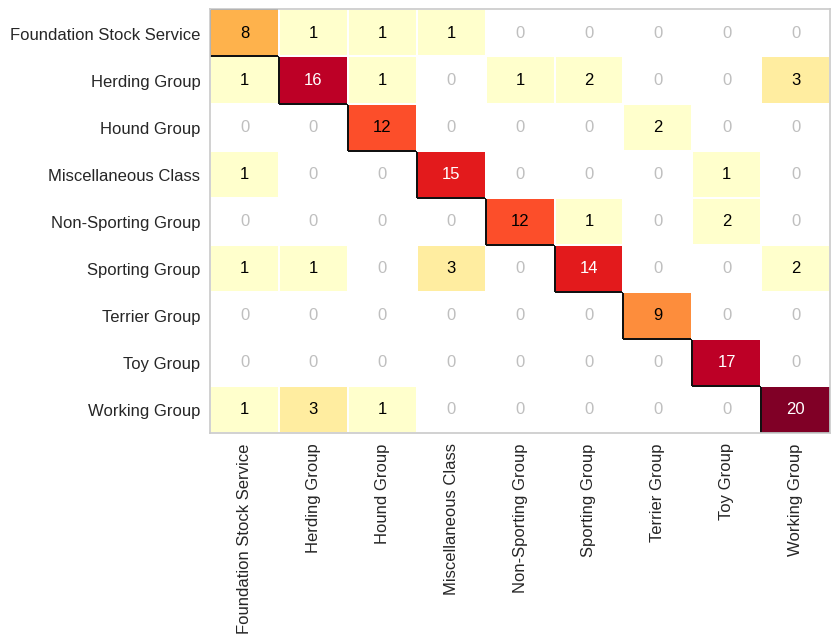

In [ ]:
cm3 = ConfusionMatrix(random_forest_akc)
cm3.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)
cm3.score(X_akc_dataset_teste, Y_akc_dataset_teste)

Com algumas mudanças de parâmetro o grupo Sporting Group também passou a ter uma taxa maior de erro.

0.7973856209150327

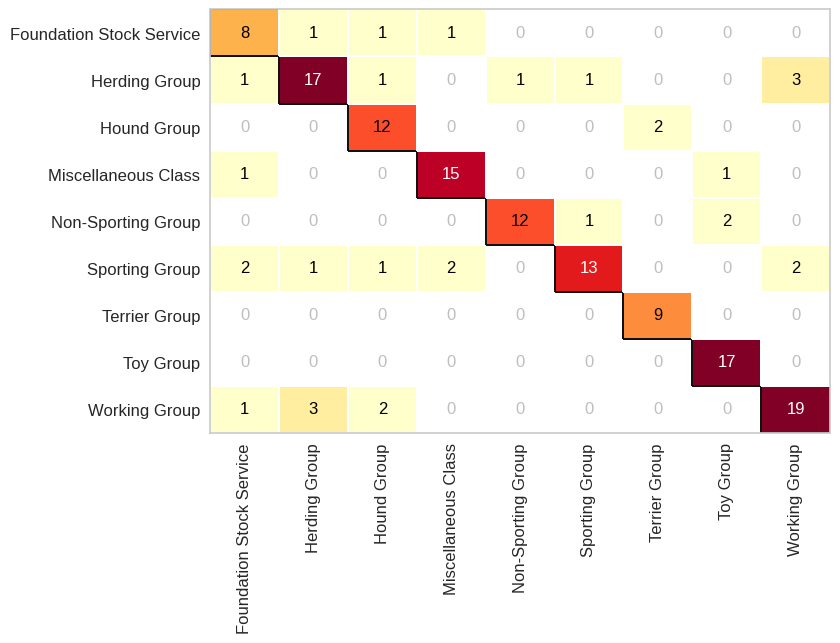

In [ ]:
cm4 = ConfusionMatrix(random_forest_akc2)
cm4.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)
cm4.score(X_akc_dataset_teste, Y_akc_dataset_teste)

Nas matrizes de confusão da rede neural , os problemas com o grupo Foundation Stock Service , Sporting Group e Herding Group continuaram porém agora Miscellaneous Class aumentou um pouco a taxa de erro e ainda existe a confusão de cães de pastoreio e de trabalho.

0.7843137254901961

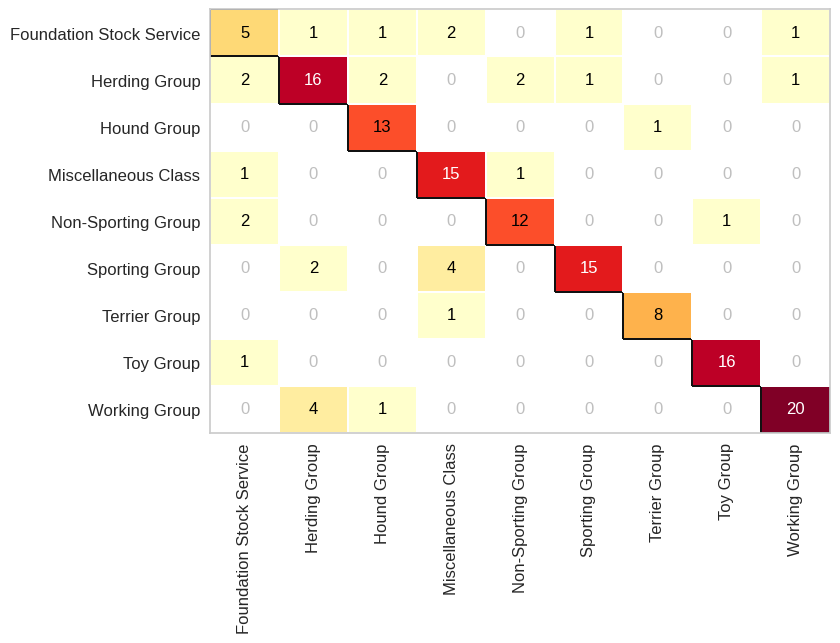

In [ ]:
cm = ConfusionMatrix(rede_neural_akc)
cm.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)
cm.score(X_akc_dataset_teste, Y_akc_dataset_teste)

Na última linha , é possível afirmar que temos 3 outliers uma vez que aparecem nas 4 matrizes caes que são do herding group e são classificados como working group.

0.7908496732026143

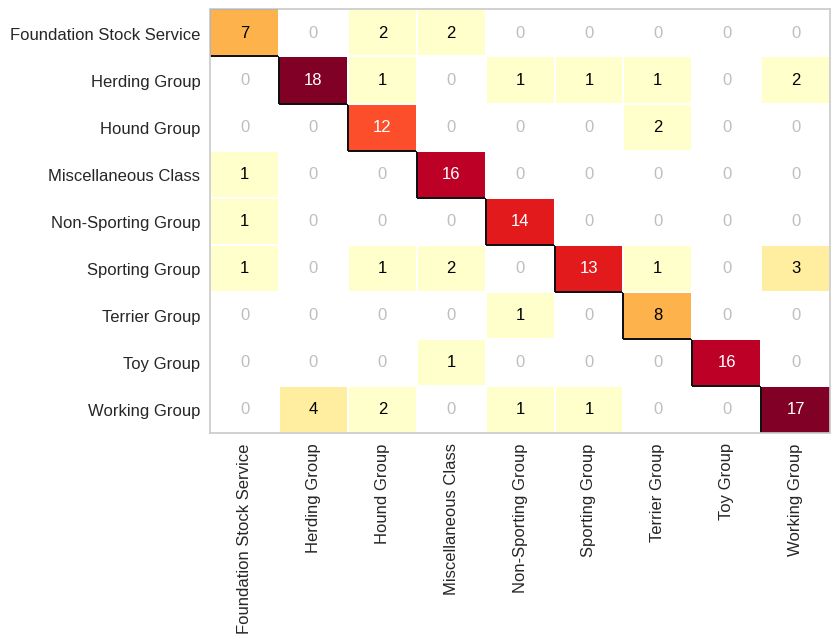

In [ ]:
cm2 = ConfusionMatrix(rede_neural_akc2)
cm2.fit(X_akc_dataset_treinamento, Y_akc_dataset_treinamento)
cm2.score(X_akc_dataset_teste, Y_akc_dataset_teste)

Vizualização de gráficos do modelo não supervisionado, foi escolhido pois fica mais visível ver os grupos gerados pelo modelo. Existem alguns grupos bem definidos como a cor 0 (azul) e a cor 4 (rosa), contudo os grupos de cor amarela e laranja escura estão misturadas com outros grupos o que pode gerar problemas.

In [ ]:
grafico9 = px.scatter(x= akc_dataset_cluster_pca[:,0], y = akc_dataset_cluster_pca[:,1], color=rotulos)
grafico9.show()

K = 5, os grupos são mais visíveis , porém a cor laranja e a cor amarela continuam se misturando bastante o que dificulta a previsão.

In [ ]:
grafico10 = px.scatter(x= akc_dataset_cluster_pca[:,0], y = akc_dataset_cluster_pca[:,1], color=rotulos)
grafico10.show()

Gráfico do DBSCAN, dividiu em 10 rótulos, esse modelo tende a ser melhor em relação ao KMeans, o gráfico demonstra uma melhor divisão entre os grupos no geral em relação ao KMeans, existem alguns outliers.

In [ ]:
grafico11 = px.scatter(x= akc_dataset_cluster_pca[:,0], y = akc_dataset_cluster_pca[:,1], color=rotulos2)
grafico11.show()

DBSCAN com as mudanças para eps = 0.7 e min_samples = 8, conseguiu dividir em 9 rótulos, a mesma quantidade de números de grupos nos modelos supervisionados. Tem uma ligeira melhora na divisão dos grupos em relação ao gráfico acima.

In [ ]:
grafico12 = px.scatter(x= akc_dataset_cluster_pca[:,0], y = akc_dataset_cluster_pca[:,1], color=rotulos3)
grafico12.show()